In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import tqdm.notebook as tqdm
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch import optim
import torch.nn as nn
from torchvision import datasets
import pip
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, cohen_kappa_score
import copy
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, plot_confusion_matrix
from IPython.display import SVG, display, clear_output

In [3]:
from google.colab import drive
drive.mount('/content/drive')ç

Mounted at /content/drive


In [9]:
normalize_mean = [0.485,0.456,0.406]
normalize_std = [0.229, 0.224, 0.225]

transform = transforms.Compose([
  transforms.Resize((224,224)),
  transforms.ToTensor(), # normaliza el rango 0-1
  transforms.Normalize(normalize_mean, normalize_std)
])

In [4]:
!mkdir -p /my_data/

In [5]:
!unzip '/content/drive/MyDrive/COVID_DETECTION/Pneumonia.zip' -d "/my_data"

Archive:  /content/drive/MyDrive/COVID_DETECTION/Pneumonia.zip
   creating: /my_data/Viral Pneumonia/
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (1).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (10).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (100).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (1000).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (1001).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (1002).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (1003).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (1004).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (1005).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (1006).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (1007).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (1008).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (1009).png  
 extracting: /my_data/Viral Pneum

In [6]:
!unzip '/content/drive/MyDrive/COVID_DETECTION/COVID.zip' -d "/my_data"

Archive:  /content/drive/MyDrive/COVID_DETECTION/COVID.zip
   creating: /my_data/COVID/
   creating: /my_data/COVID/COVID/
 extracting: /my_data/COVID/COVID (1).png  
 extracting: /my_data/COVID/COVID (10).png  
 extracting: /my_data/COVID/COVID (100).png  
 extracting: /my_data/COVID/COVID (1000).png  
 extracting: /my_data/COVID/COVID (1001).png  
 extracting: /my_data/COVID/COVID (1002).png  
 extracting: /my_data/COVID/COVID (1003).png  
 extracting: /my_data/COVID/COVID (1004).png  
 extracting: /my_data/COVID/COVID (1005).png  
 extracting: /my_data/COVID/COVID (1006).png  
 extracting: /my_data/COVID/COVID (1007).png  
 extracting: /my_data/COVID/COVID (1008).png  
 extracting: /my_data/COVID/COVID (1009).png  
 extracting: /my_data/COVID/COVID (101).png  
 extracting: /my_data/COVID/COVID (1010).png  
 extracting: /my_data/COVID/COVID (1011).png  
 extracting: /my_data/COVID/COVID (1012).png  
 extracting: /my_data/COVID/COVID (1013).png  
 extracting: /my_data/COVID/COVID (101

In [7]:
!unzip '/content/drive/MyDrive/COVID_DETECTION/NORMAL.zip' -d "/my_data"

Archive:  /content/drive/MyDrive/COVID_DETECTION/NORMAL.zip
   creating: /my_data/NORMAL/
 extracting: /my_data/NORMAL/NORMAL (1).png  
 extracting: /my_data/NORMAL/NORMAL (10).png  
 extracting: /my_data/NORMAL/NORMAL (100).png  
 extracting: /my_data/NORMAL/NORMAL (1000).png  
 extracting: /my_data/NORMAL/NORMAL (1001).png  
 extracting: /my_data/NORMAL/NORMAL (1002).png  
 extracting: /my_data/NORMAL/NORMAL (1003).png  
 extracting: /my_data/NORMAL/NORMAL (1004).png  
 extracting: /my_data/NORMAL/NORMAL (1005).png  
 extracting: /my_data/NORMAL/NORMAL (1006).png  
 extracting: /my_data/NORMAL/NORMAL (1007).png  
 extracting: /my_data/NORMAL/NORMAL (1008).png  
 extracting: /my_data/NORMAL/NORMAL (1009).png  
 extracting: /my_data/NORMAL/NORMAL (101).png  
 extracting: /my_data/NORMAL/NORMAL (1010).png  
 extracting: /my_data/NORMAL/NORMAL (1011).png  
 extracting: /my_data/NORMAL/NORMAL (1012).png  
 extracting: /my_data/NORMAL/NORMAL (1013).png  
 extracting: /my_data/NORMAL/NORMAL

In [ ]:
dataset = datasets.ImageFolder('/my_data', transform=transform)

In [ ]:
dataset

In [ ]:
n_train = 4064
n_valid = 508
n_test = 508

In [ ]:
train_ds, val_ds, test_ds = torch.utils.data.random_split(dataset, [n_train, n_valid, n_test])

In [ ]:
batch_size = 128
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle = True)
val_loader = DataLoader(val_ds, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle = True)

In [ ]:
dataloaders_entrenamiento = {"Train":train_loader, "Validation":val_loader}
data_sizes = {x: len(dataloaders_entrenamiento[x].sampler) for x in ['Train','Validation']}

In [10]:
dataset = datasets.ImageFolder('/GRAD CAM', transform=transform)

In [16]:
dataloader = DataLoader(dataset=dataset, shuffle=False, batch_size=1)

In [21]:
densenet201 =torchvision.models.densenet201(pretrained=True)
densenet201

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [22]:
class DenseNet(nn.Module):
    def __init__(self):
        super(DenseNet, self).__init__()
        
        # get the pretrained DenseNet201 network
        self.densenet = torchvision.models.densenet201(pretrained=True)
        
        # disect the network to access its last convolutional layer
        self.features_conv = self.densenet.features
        
        # add the average global pool
        self.global_avg_pool = nn.AvgPool2d(kernel_size=7, stride=1)
        
        # get the classifier of the vgg19
        self.classifier = self.densenet.classifier
        
        # placeholder for the gradients
        self.gradients = None
    
    # hook for the gradients of the activations
    def activations_hook(self, grad):
        self.gradients = grad
        
    def forward(self, x):
        x = self.features_conv(x)
        
        # register the hook
        h = x.register_hook(self.activations_hook)
        
        # don't forget the pooling
        x = self.global_avg_pool(x)
        x = x.view((1, 1920))
        x = self.classifier(x)
        return x
    
    def get_activations_gradient(self):
        return self.gradients
    
    def get_activations(self, x):
        return self.features_conv(x)

In [26]:
# initialize the VGG model
densenet = DenseNet()

# set the evaluation mode
densenet.eval()

# get the image from the dataloader
img, _ = next(iter(dataloader))

# get the most likely prediction of the model
pred = densenet(img)
pred

tensor([[-1.8947e+00, -3.3812e-01,  1.1601e+00,  2.8786e+00,  1.2788e+00,
         -1.2661e-01, -3.1885e-01, -1.3433e+00, -1.3186e+00,  3.4044e-01,
         -4.5266e+00, -1.5974e+00, -1.4554e+00, -1.8783e+00, -2.1146e+00,
          1.5764e+00, -4.7402e-01, -1.6974e+00, -1.8492e+00, -3.4209e-01,
         -2.3273e+00, -1.1704e+00,  1.5081e+00, -1.3626e-01,  1.7781e+00,
         -3.5773e+00,  1.0482e+00, -2.0135e+00, -2.6428e+00,  3.1859e+00,
         -1.7684e+00, -2.5064e+00, -2.6464e+00,  2.2923e+00,  8.3456e-01,
          7.0467e-01,  1.4046e+00, -3.2583e+00, -2.1719e+00, -1.8246e+00,
          1.7117e-01, -3.9097e+00, -4.7548e+00, -3.4532e+00, -5.2295e-01,
         -2.2400e+00, -5.9975e-01, -2.4944e+00,  5.6128e-01, -2.2757e+00,
         -4.4190e-01, -5.2031e+00,  1.6900e+00, -1.6179e+00, -9.3766e-01,
         -1.4306e+00, -4.6973e+00, -3.2007e+00,  1.2049e-01, -1.7911e+00,
         -1.7242e+00, -2.4061e+00, -8.9593e-01, -9.6206e-01, -2.3893e+00,
         -2.5170e+00, -2.1122e+00, -1.

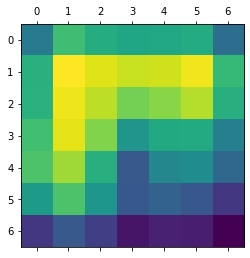

In [30]:


# pull the gradients out of the model
gradients = densenet.get_activations_gradient()

# pool the gradients across the channels
pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])

# get the activations of the last convolutional layer
activations = densenet.get_activations(img).detach()

# weight the channels by corresponding gradients
for i in range(512):
    activations[:, i, :, :] *= pooled_gradients[i]
    
# average the channels of the activations
heatmap = torch.mean(activations, dim=1).squeeze()

# relu on top of the heatmap
# expression (2) in https://arxiv.org/pdf/1610.02391.pdf
heatmap = np.maximum(heatmap, 0)

# normalize the heatmap
heatmap /= torch.max(heatmap)

# draw the heatmap
plt.matshow(heatmap.squeeze())

In [69]:
import cv2
img = cv2.imread('/GRAD CAM/COVID/COVID (1000).png')
height, width, _ = img.shape
heatmap = cv2.applyColorMap(
cv2.resize(img[0],(width, height)), cv2.COLOR_BGR2GRAY)
result = heatmap + img 
cv2.imwrite('/GRAD CAM/COVID/CAM2.png', result)
result

array([[[218,  46, 232],
        [219,  47, 233],
        [216,  44, 230],
        ...,
        [ 37, 121,  51],
        [239,  67, 253],
        [182,  10, 196]],

       [[230,  58, 245],
        [237,  65, 252],
        [229,  57, 244],
        ...,
        [ 36, 120,  51],
        [242,  70,   1],
        [179,   7, 194]],

       [[231,  57, 243],
        [227,  53, 239],
        [234,  60, 246],
        ...,
        [ 37, 119,  49],
        [244,  70,   0],
        [179,   5, 191]],

       ...,

       [[241, 106,  74],
        [246, 111,  79],
        [249, 114,  82],
        ...,
        [216,  81,  49],
        [198,  63,  31],
        [181,  46,  14]],

       [[191,  29, 226],
        [192,  30, 227],
        [191,  29, 226],
        ...,
        [181,  19, 216],
        [179,  17, 214],
        [168,   6, 203]],

       [[168, 234, 146],
        [169, 235, 147],
        [169, 235, 147],
        ...,
        [155, 221, 133],
        [154, 220, 132],
        [150, 216, 128]]

In [64]:
import cv2
img = cv2.imread('/GRAD CAM/COVID/COVID (1000).png')
height, width, _ = img.shape
heatmap = cv2.applyColorMap(
cv2.resize(img[0],(width, height)), cv2.COLORMAP_JET)
heatmap = np.uint8(255 * heatmap)
result = heatmap * 0.229 + img 
cv2.imwrite('/GRAD CAM/COVID/CAM2.png', result)
result

array([[[134.778, 116.229, 155.846],
        [135.778, 117.229, 156.846],
        [132.778, 114.229, 153.846],
        ...,
        [209.778, 191.229, 230.846],
        [155.778, 137.229, 176.846],
        [ 98.778,  80.229, 119.846]],

       [[147.694, 128.229, 166.93 ],
        [154.694, 135.229, 173.93 ],
        [146.694, 127.229, 165.93 ],
        ...,
        [209.694, 190.229, 228.93 ],
        [159.694, 140.229, 178.93 ],
        [ 96.694,  77.229, 115.93 ]],

       [[145.946, 129.229, 170.678],
        [141.946, 125.229, 166.678],
        [148.946, 132.229, 173.678],
        ...,
        [207.946, 191.229, 232.678],
        [158.946, 142.229, 183.678],
        [ 93.946,  77.229, 118.678]],

       ...,

       [[139.   , 168.312, 139.229],
        [144.   , 173.312, 144.229],
        [147.   , 176.312, 147.229],
        ...,
        [114.   , 143.312, 114.229],
        [ 96.   , 125.312,  96.229],
        [ 79.   , 108.312,  79.229]],

       [[127.014,  89.229, 109.61 ],
  

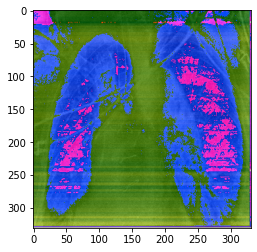

In [70]:
image = plt.imread('/GRAD CAM/COVID/CAM2.png')
plt.imshow(image)